# Results and Conclusion

In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)

% matplotlib inline

In [13]:
results = pd.read_csv("data/results.csv")
results_sm = pd.read_csv("data/results_sm.csv")

## Results

### Raw dataset

We stratify sampled the loan data before 2013 to avoid the sample bias of 'Current Loan' and trained the following models: logistic regression, KNN, LDA, QDA, Single Decision Tree, Random Forest, AdaBoost and Neural Networks. Except for QDA with less than 50% test accuracy, all the models are able to achieve the test accuracies around 80% which are similar to the test accuracy of baseline model. However, as discussed in the modeling session, recall is more important for our problem and we can sacrifice some accuracies for recall. In other words, we would like our model to capture the real bad loans, even at the cost of misclassifying some good loans. 
 
From the recall perspective, QDA has the highest recall, more than 60%, but the test accuracy is too much lower than the baseline model so we do not think QDA would be a good model for our prediction. For the rest of the models, LDA has the highest recall ratio and F1 score, which balanced the recall with precision. Although LDA has the highest recall, the recall ratio is still low, less than 20%. Among the models, LDA may be the best but it really did not improve much from the baseline model which always predicts the loan as 'Good Loan'.

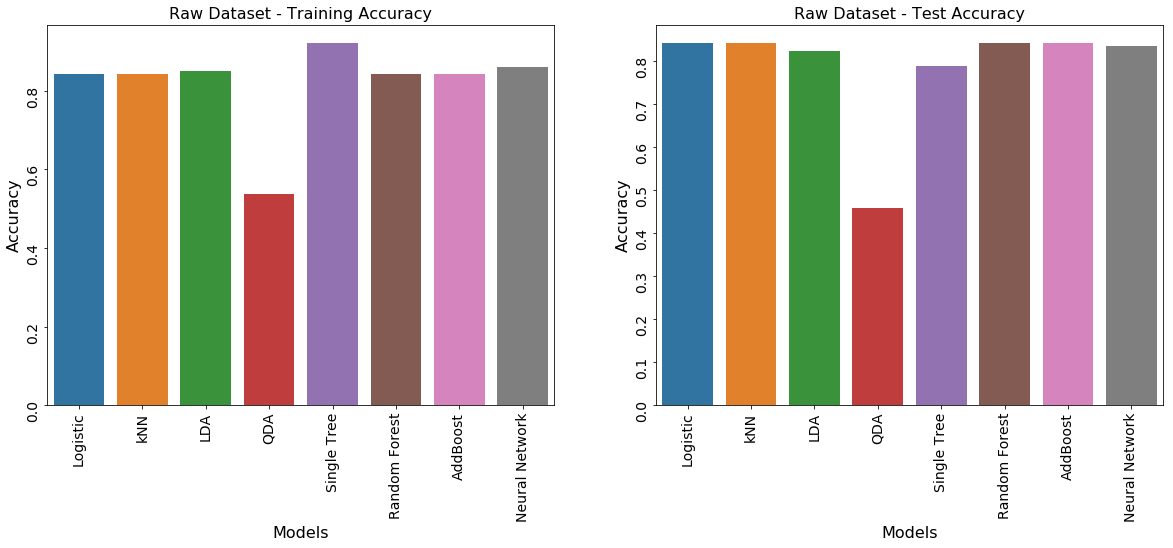

In [14]:
f, ax = plt.subplots(1, 2, figsize=(20,7))

g1 = sns.barplot(results['model'], results['train_acc'], data=results, ax=ax[0])
g1.set_title('Raw Dataset - Training Accuracy', fontsize=16)
g1.set_xlabel('Models', fontsize=16)
g1.set_ylabel('Accuracy', fontsize=16)
g1.tick_params(labelsize=14, rotation=90)

g2 = sns.barplot(results['model'], results['test_acc'], data=results, ax=ax[1])
g2.set_title('Raw Dataset - Test Accuracy', fontsize=16)
g2.set_xlabel('Models', fontsize=16)
g2.set_ylabel('Accuracy', fontsize=16)
g2.tick_params(labelsize=14, rotation=90)

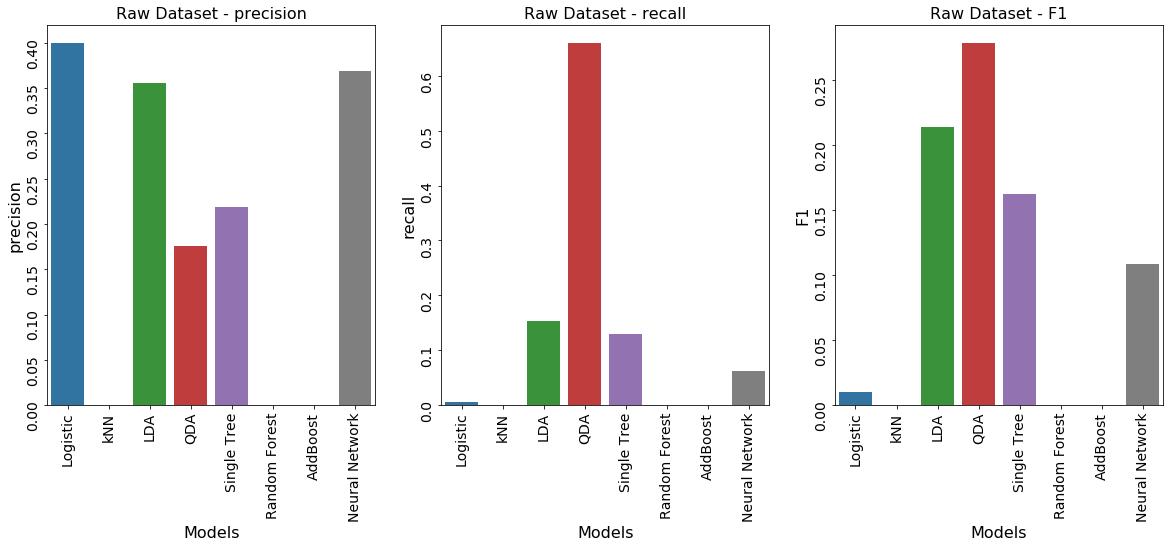

In [15]:
f, ax = plt.subplots(1, 3, figsize=(20,7))

g1 = sns.barplot(results['model'], results['precision'], data=results, ax=ax[0])
g1.set_title('Raw Dataset - precision', fontsize=16)
g1.set_xlabel('Models', fontsize=16)
g1.set_ylabel('precision', fontsize=16)
g1.tick_params(labelsize=14, rotation=90)

g2 = sns.barplot(results['model'], results['recall'], data=results, ax=ax[1])
g2.set_title('Raw Dataset - recall', fontsize=16)
g2.set_xlabel('Models', fontsize=16)
g2.set_ylabel('recall', fontsize=16)
g2.tick_params(labelsize=14, rotation=90)

g3 = sns.barplot(results['model'], results['F1'], data=results, ax=ax[2])
g3.set_title('Raw Dataset - F1', fontsize=16)
g3.set_xlabel('Models', fontsize=16)
g3.set_ylabel('F1', fontsize=16)
g3.tick_params(labelsize=14, rotation=90)

### SMOTE Dataset

The reason the recall ratios are low for our models when training with raw data is our imbalanced dataset with more than 80% 'Good Loans'. After using SMOTE to oversample the training set with more 'Bad Loans', the recall ratios of the models improved dramatically. Logistic regression, LDA and QDA have the highest recall ratios more than 50%, and logistic regression and LDA also have the highest F1 score as well.
 
Logistic regression and LDA have the similar test accuracy more than 60% which is higher than QDA’s test accuracy ~50%. We are not able to distinguish the two models based on accuracy, recall ratio and F1 score. Given the simplicity with less assumptions and the popularity to predict default probability in the financial industry, we recommend to use logistic regression trained through oversampling to predict the default probability of the lending club loans.

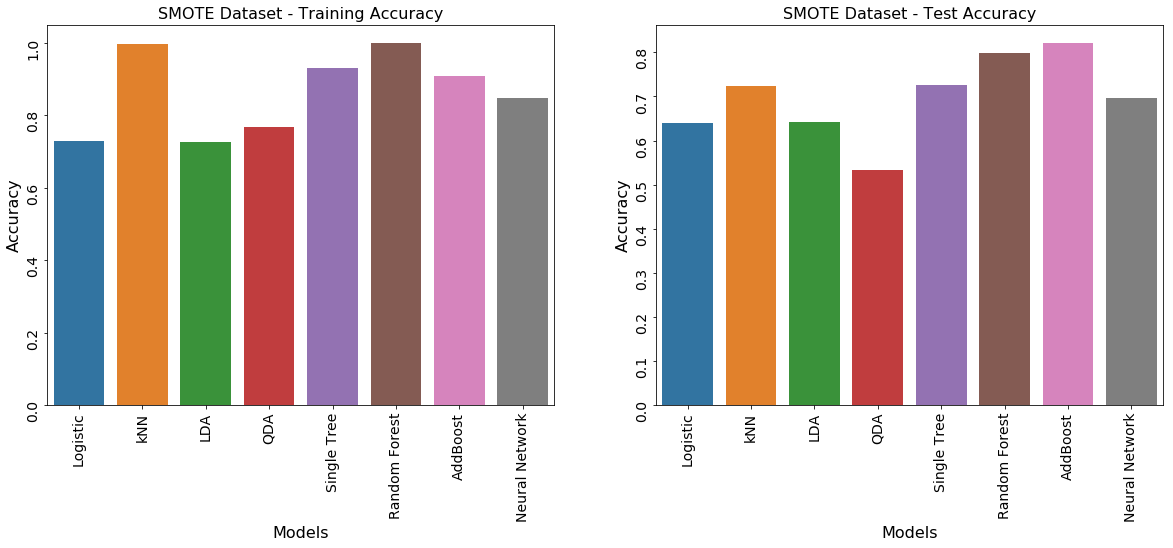

In [16]:
f, ax = plt.subplots(1, 2, figsize=(20,7))

g1 = sns.barplot(results_sm['model'], results_sm['train_acc'], data=results_sm, ax=ax[0])
g1.set_title('SMOTE Dataset - Training Accuracy', fontsize=16)
g1.set_xlabel('Models', fontsize=16)
g1.set_ylabel('Accuracy', fontsize=16)
g1.tick_params(labelsize=14, rotation=90)

g2 = sns.barplot(results_sm['model'], results_sm['test_acc'], data=results_sm, ax=ax[1])
g2.set_title('SMOTE Dataset - Test Accuracy', fontsize=16)
g2.set_xlabel('Models', fontsize=16)
g2.set_ylabel('Accuracy', fontsize=16)
g2.tick_params(labelsize=14, rotation=90)

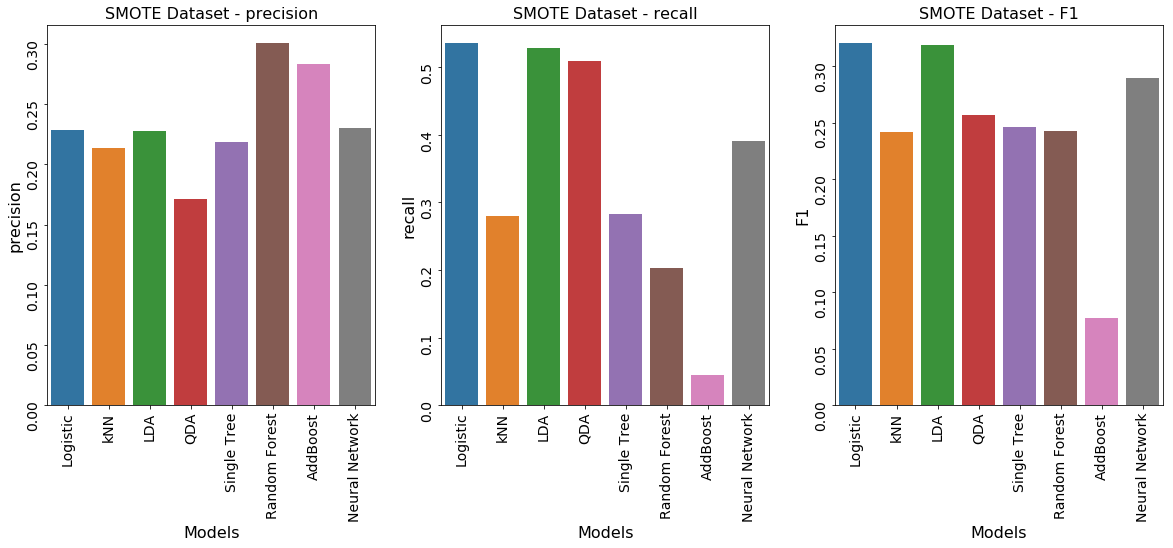

In [17]:
f, ax = plt.subplots(1, 3, figsize=(20,7))

g1 = sns.barplot(results_sm['model'], results_sm['precision'], data=results_sm, ax=ax[0])
g1.set_title('SMOTE Dataset - precision', fontsize=16)
g1.set_xlabel('Models', fontsize=16)
g1.set_ylabel('precision', fontsize=16)
g1.tick_params(labelsize=14, rotation=90)

g2 = sns.barplot(results_sm['model'], results_sm['recall'], data=results_sm, ax=ax[1])
g2.set_title('SMOTE Dataset - recall', fontsize=16)
g2.set_xlabel('Models', fontsize=16)
g2.set_ylabel('recall', fontsize=16)
g2.tick_params(labelsize=14, rotation=90)

g3 = sns.barplot(results_sm['model'], results_sm['F1'], data=results_sm, ax=ax[2])
g3.set_title('SMOTE Dataset - F1', fontsize=16)
g3.set_xlabel('Models', fontsize=16)
g3.set_ylabel('F1', fontsize=16)
g3.tick_params(labelsize=14, rotation=90)

## Conclusions

Like many financial predictions, predicting the default risk of the loans is definitely not an easy job given the imbalance dataset. Similar to identifying cancers, missing default loans is more serious than misclassified the good loans. In this case, we are willing to sacrifice accuracy with higher recall ratio. After balancing the recall ratio with testing accuracy, we decide to choose logistic regression trained with SMOTE dataset with 53% recall and 64% test accuracy to predict the default loans.

![png](LC_Models_files/LC_Models_25_0.png)

## Future Work

Without oversampling the training dataset with more ‘bad loans’, none of the models are able to significantly outperform the baseline model. This means we need to add more predictive features to our model. We could talk to Lending Club to see if we can get more PII information of the borrowers.


In addition, we can also derive more predictors from the existing features for the future work. For example, we can add more macro-economic indicators, such as GDP, unemployment rates, interest rate etc, based on the date and zip code of the loan. The default of the loans could also be impacted by the macro economy.


Furthermore, in order to remove the bias of the large number of ‘current loan’ for the most recent loan data, we only used the dataset before 2013 to train the model. As mentioned earlier, macro economy could also impact the default of the loan so that using model trained with dataset from 5 years ago to predict newly incepted loan now may not be accurate. Again, this could be improved by adding more macro-economic indicators as our predictors.